<a href="https://colab.research.google.com/github/ShinAsakawa/ShinAsakawa.github.io/blob/master/2022notebooks/2022_0306bit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import get_ipython
isColab =  'google.colab' in str(get_ipython())
if isColab:
    # 2022_0416 現在 Google colabratory 上にインストールされている Pillow のバージョンが古い。
    # そのため，テキスト領域境界ボックス `PIL.ImageDraw.textbbox` が動作しない。
    # 最新版の Pillow にアップグレードして，このランタイムをリスタートさせる必要がある
    !pip install --upgrade Pillow

    !mkdir Noto_JP_fonts
    !wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifJP.zip
    !wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansJP.zip
    !unzip NotoSerifJP.zip -d Noto_JP_fonts
    !unzip -o NotoSansJP.zip -d Noto_JP_fonts  # `-o` means overwrite 
    !rm NotoSerifJP.zip NotoSansJP.zip

- Google の TrueType fonts である Noto fonts を使っている。を用いて，日本語フォントをハンドリングしている。
現在，使用可能なフォント名は以下の通りである:

['NotoSansJP-Black', 'NotoSansJP-Bold',  'NotoSansJP-Light',  'NotoSansJP-Medium',  'NotoSansJP-Regular',  'NotoSansJP-Thin',
 'NotoSerifJP-Black', 'NotoSerifJP-Bold',  'NotoSerifJP-ExtraLight',  'NotoSerifJP-Light',  'NotoSerifJP-Medium',  'NotoSerifJP-Regular',  'NotoSerifJP-SemiBold']

日本語フォント名としては，`San` はゴチック，`Serif` は明朝と呼ばれているフォントに近い。

### オリジナル図版を表示するには，以下のようにする:

```python
!git clone https://github.com/ShinAsakawa/bit

from bit import BIT
bit = BIT()

bit.show_original_image(task='line_bisection')
```

ここで `task` には，以下の 4 種が指定可能である。['line_bisection', 'line_erasion',  'letter_erasion',  'star_erasion']

## BIT tasks implemented: 

- 線分二等分テスト line bisection 
- 線分抹消テスト line cancellation
- 文字抹消テスト letter cancellation
- 星印抹消テスト star cancellation

- source: https://strokengine.ca/en/assessments/behavioral-inattention-test-bit/

* **線分抹消課題 line crossing**: ページ上のすべての線を検出して消すことが求められる。
検査者は中央の列にある 4 本の線のうち，2 本を消すことで課題の内容を患者に示し，次に患者にページ上に見えるすべ
ての線を消すように指示する。
* **文字抹消課題 letter cancellation** : 紙と鉛筆を使用した検査で，患者は妨害刺激である文字の埋め込まれた画像
から指定された標的文字を走査して探し出し，消去することが求められる。
一枚の刺激図版には 34個 の大文字が 5 列に並んでいる。
40 個の標的刺激は，ページの両側に同数ずつ配置されている。
各文字の高さは 6 mmで、2 mmの間隔で配置されています。
* **星印抹消課題 star cancellation**: 言語および非言語刺激のランダムな配列で構成される。
52 個の大きな星 (14mm)，ランダムに配置された 13 個の文字，19 個の短い (3-4文字) 単語が，56 個の小さな星 (8mm) 
の中に散りばめられており，この小さな星印が標的刺激となる。
患者は小さな星をすべて抹消するように指示される。
* 図と形の模写:  被検査者はページの左側に描かれた 3 つの単純な絵をコピーするよう求められる。
3 つの絵 (四角い星，立方体，デイジー) は縦に配置されており，患者に明確に示される。
* 2 番目のテストでは、別の刺激シートに提示された 3 つの幾何学的図形の群を模写することが求められる。
前の項目とは異なり，ページの内容は患者に指摘されない。
* **線分二等分課題 line bisection**:  患者は水平線の中点を推定して示すことを求められる。
左無視の患者は，真の中心よりも右側の中間点を選択することが予想される。
それぞれの患者には 8 インチの太さ 1 mmの黒い水平線が 3 本，階段状に表示されている。
それぞれの線の範囲は，患者にはっきりと指摘され，患者は中心をマークするように指示される。

#### 文献

- Halligan, P., Cockburn, J., Wilson, B. (1991). The Behavioural Assessment of Visual Neglect. Neuropsychological Rehabilitation 1, 5-32.
- 石合純夫代表 日本版差規制委員会 (1999) BIT 行動性無視検査日本版，新興医学出版社，東京


In [ ]:
%load_ext autoreload
%autoreload 2

!if [ -d bit ]; then rm -rf bit; fi
!git clone https://github.com/ShinAsakawa/bit
from bit import BIT
bit = BIT()
bit.show_original_image(task='line_bisection')
print(bit.__doc__)

In [2]:
import os
import sys
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
#bit.show_original_image(task='star_erasion')
#bit.tasks
bit.set_new_canvas()
bit.write_text_on_self_canvas('本日天気晴朗ナレドモ波高シ',fg_color='teal', fontsize=128, bbox=True)
#plt.imshow(bit.canvas)
bit.dislay_self_canvas()

In [ ]:
# modified from `https://stackoverflow.com/questions/7698231/pil-draw-multiline-text-on-image`
from PIL import Image, ImageDraw, ImageFont

img = Image.new("RGB", (800, 600))
draw = ImageDraw.Draw(img)

if True:
    bbox_fill = None
    bbox_outline = (255, 0, 0)
else:
    bbox_fill = (0, 0, 0)
    bbox_outline = None

    
font = ImageFont.truetype("Noto_JP_fonts/NotoSansJP-Bold.otf", 16)
draw.text((10, 20), "ImageDraw.multiline_text/.multiline_textsize", font=font)
draw.text((10, 170), "ImageDraw.multiline_text/.textbbox", font=font)
draw.text((10, 320), "ImageDraw.multiline_text/.textbbox with Adjust", font=font)
    
for text, fontname, x in [("日本語も\n可能なり", "Noto_JP_fonts/NotoSansJP-Bold.otf", 350)]:
#for text, fontname, x in [("A", "ITCBLKAD.TTF", 250), ("A\nj", "ITCBLKAD.TTF", 300), ("日本語も\n可能なり", "Noto_JP_fonts/NotoSansJP-Bold.otf", 350)]:
    font = ImageFont.truetype(fontname, 40)

    tl = (x, 50)
    draw.multiline_text(tl, text, font=font)
    sz = draw.multiline_textsize(text, font=font)
    draw.rectangle((tl, (tl[0] + sz[0], tl[1] + sz[1])), fill=bbox_fill, outline=bbox_outline)
    draw.line((tl, (tl[0], tl[1] - 5)))

    tl = (x, 200)
    draw.multiline_text(tl, text, font=font)
    bbox = draw.multiline_textbbox(tl, text, font=font)
    draw.rectangle(bbox, fill=bbox_fill, outline=bbox_outline)
    draw.line((tl, (tl[0], tl[1] - 5)))

    tl = (x, 350)
    bbox = draw.multiline_textbbox((0, 0), text, font=font)
    draw.multiline_text((tl[0] - bbox[0], tl[1] - bbox[1]), text, font=font)
    draw.rectangle(((tl[0], tl[1]), (tl[0] + bbox[2] - bbox[0], tl[1] + bbox[3] - bbox[1])), fill=bbox_fill, outline=bbox_outline)
    draw.line(((tl[0], tl[1] - 5), (tl[0], tl[1]), (tl[0] - 5, tl[1])))

img

In [ ]:
#sorted(bit.fontnames)
img = bit.make_a_letter_cancellation_image(fontname='NotoSerifJP-Black')
plt.figure(figsize=(12,10))
plt.imshow(img)

In [7]:
print(bit.hira_select())

None


In [8]:
import os
#?os.path.abspath
?bit

In [9]:
#help(bit)
#[x for x in bit.fontdata]
#print(list(PIL.ImageColor.colormap))
#print(np.random.choice(bit.colornames))

#bit.draw_a_bisecition_lines()
#print(dir(bit))

In [ ]:
import matplotlib.pyplot as plt
#img = bit.make_a_letter_cancellation_image()

#help(bit.make_a_letter_cancellation_image)
#help(bit.set_font)
for i, fontname in enumerate(bit.fontdata):
    #print(f'fontname:{fontname}')
    #img = bit.make_a_letter_cancellation_image() # fontname=fontname)
    img = bit.make_a_letter_cancellation_image(fontname=fontname, fg_color='rand')

    #plt.figure(figsize=(8,4))
    plt.figure(figsize=(12,10))
    plt.imshow(img)
    if i >= 8:
        break
    

In [ ]:
#print(dir(bit))
#bit.set_font('NotoSerifJP-Bold')
#bit.draw_bisection_lines()
imgs = bit.make_line_bisection_task_images()
print(type(imgs))

In [ ]:
draw = ImageDraw.Draw(imgs[0])
font = ImageFont.truetype(bit.fontdata['NotoSerifJP-Bold']['fname'], size=512)
draw.text((1000,1009), text='ほげー', fill='black', font=font)
plt.imshow(imgs[0])


In [ ]:
#help(ImageFont.truetype)
bit.fontdata

In [ ]:
bit.show_original_image(task='star_erasion')
bit.show_original_image(task='line_erasion')
bit.show_original_image(task='letter_erasion')
#bit.tasks
#img = bit.draw_text()
#plt.imshow(img)
#bit.show_original_image()

In [ ]:
#bit.fontdata
bit.fontdata['NotoSerifJP-Bold']

In [ ]:
import PIL
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import matplotlib.pyplot as plt

img = Image.new('RGB', (bit._width, bit._height), (255,255,255))
draw = ImageDraw.Draw(img)
draw.text((1000,1000),text="abcd",fill='black') # , font=bit.fontdata['NotoSerifJP-Bold'])

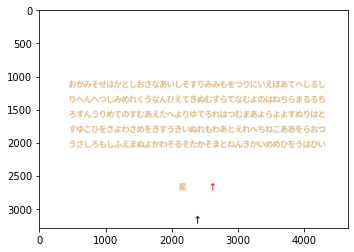

In [17]:
plt.imshow(img)

- source: [Object Detection, Instance Segmentation and Person Keypoint Detection](https://pytorch.org/vision/stable/models.html#object-detection-instance-segmentation-and-person-keypoint-detection)

検出，実体分割，キーポイント検出のための事前学習済みモデルは，torchvision の分類モデルで初期化される。
<!-- The pre-trained models for detection, instance segmentation and keypoint detection are initialized with the classification models in torchvision.-->

モデルへの入力には 0-1 の範囲の `Tensor[C, H, W]` のリストが期待されている。
モデル内部で画像のリサイズを行う。
だが，その動作はモデルによって異なる。
詳細はモデルのコンストラクタを参照のこと。
これらモデルの出力形式は，[実体分割モデル](https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html#instance-seg-output) で説明されている。
<!-- The models expect a list of Tensor[C, H, W], in the range 0-1. The models internally resize the images but the behaviour varies depending on the model. Check the constructor of the models for more information. The output format of such models is illustrated in Instance segmentation models. -->

物体検出とインスタンス分割の場合，事前に学習されたモデルは以下のクラスの予測値を返す。
<!-- For object detection and instance segmentation, the pre-trained models return the predictions of the following classes: -->

## [実体分割モデル Instance segmentation models](https://pytorch.org/vision/stable/auto_examples/plot_visualization_utils.html#instance-seg-output)

実体分割モデルは，意味分割モデルとは大きく異なる出力を持つ。
ここでは，そのようなモデルのマスクをプロットする方法を見ることにする。
まず Mask-RCNN モデルの出力を分析することから始めよう。
これらのモデルは画像を正規化する必要がないので，正規化されたバッチを使用する必要がないことに注意。
<!-- Instance segmentation models have a significantly different output from the semantic segmentation models. 
We will see here how to plot the masks for such models. 
Let’s start by analyzing the output of a Mask-RCNN model. 
Note that these models don’t require the images to be normalized, so we don’t need to use the normalized batch.
-->

注:

ここでは Mask-RCNN モデルの出力について説明する。
[物体検出，実体分割，人物キーポイント検出](https://pytorch.org/vision/stable/models.html#object-det-inst-seg-pers-keypoint-det) のモデルは，どれも似たような出力形式だが，中には `keypointrcnn_resnet50_fpn()` のようにキーポイントのような余計な情報を持っていたり `fasterrcnn_resnet50_fpn()` のようにマスクを持たなかったりするものもある。
<!-- We will here describe the output of a Mask-RCNN model. 
The models in [Object Detection, Instance Segmentation and Person Keypoint Detection] all have a similar output format, but some of them may have extra info like keypoints for keypointrcnn_resnet50_fpn(), and some of them may not have masks, like `fasterrcnn_resnet50_fpn()`.
-->

```python
from torchvision.models.detection import maskrcnn_resnet50_fpn
model = maskrcnn_resnet50_fpn(pretrained=True, progress=False)
model = model.eval()

output = model(batch)
print(output)
```

```bash
Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/hub/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
[{'boxes': tensor([[219.7444, 168.1722, 400.7379, 384.0263],
        [343.9716, 171.2287, 358.3447, 222.6263],
        [301.0303, 192.6917, 313.8879, 232.3154]], grad_fn=<StackBackward0>), 'labels': tensor([18,  1,  1]), 'scores': tensor([0.9987, 0.7187, 0.6525], grad_fn=<IndexBackward0>), 'masks': tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
```

上記を分解，解説してみる。
バッチ内の各画像に対して，モデルはいくつかの検出値 (または実体) を出力する。
検出数は入力画像ごとに異なる。
各実体は，バウンディングボックス，ラベル，スコア，マスクによって記述される。
<!-- Let’s break this down. 
For each image in the batch, the model outputs some detections (or instances). 
The number of detections varies for each input image. Each instance is described by its bounding box, its label, its score and its mask.-->

出力の構成は以下の通りである。
出力は，長さ `batch_size` 分のリストである。
リストの各エントリは入力画像に対応し，キー 'boxes', 'labels', 'scores', および 'masks' を持つ 辞書 である。
これらのキーに関連付けられた各値は，その中に `num_instances` 個の要素を持つ。
上例では 1 枚目の画像で 3 つの実体が検出され，2 枚目の画像では 2 つの実体が検出されている。
<!--
The way the output is organized is as follows: 
the output is a list of length batch_size. 
Each entry in the list corresponds to an input image, and it is a dict with keys ‘boxes’, ‘labels’, ‘scores’, and ‘masks’. 
Each value associated to those keys has num_instances elements in it. 
In our case above there are 3 instances detected in the first image, and 2 instances in the second one.
-->

ボックスは上記のように [draw_bounding_boxes()](https://pytorch.org/vision/stable/generated/torchvision.utils.draw_bounding_boxes.html#torchvision.utils.draw_bounding_boxes) でプロットすることができるが，ここではマスクの方に興味がある。
これらのマスクは，上で見た意味分割モデルのマスクとは全く異なる。
<!-- The boxes can be plotted with draw_bounding_boxes() as above, but here we’re more interested in the masks. 
These masks are quite different from the masks that we saw above for the semantic segmentation models. -->

```python
dog1_output = output[0]
dog1_masks = dog1_output['masks']
print(f"shape = {dog1_masks.shape}, dtype = {dog1_masks.dtype}, "
      f"min = {dog1_masks.min()}, max = {dog1_masks.max()}")
```

上の出力は 以下のごとくである:

```bash
shape = torch.Size([3, 1, 500, 500]), dtype = torch.float32, min = 0.0, max = 0.9999862909317017
```

ここで，マスクは各画素について，その実体の予測されたラベルに属する可能性がどの程度あるかを示す確率に対応するものである。
これらの予測されたラベルは，同じ出力辞書の ‘labels' 要素に対応する。
最初の画像の実体に対して，どのラベルが予測されたかを見てみよう。
<!-- Here the masks corresponds to probabilities indicating, for each pixel, how likely it is to belong to the predicted label of that instance. 
Those predicted labels correspond to the ‘labels’ element in the same output dict. 
Let’s see which labels were predicted for the instances of the first image.-->

```python
# https://github.com/amikelive/coco-labels を参考に日本語訳したもの 全 91 種類
inst_classes = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

CLASSES = [
    '背景',                                                       # 0
    '人', '自転車', '車', 'バイク', '飛行機',                        # [01-05]
    'バス', '電車', 'トラック','ボート', '信号機',                    # [06-10]
    '消火栓', '道路標識', '停止サイン', 'パーキングメーター', 'ベンチ',   # [11-15]
    '鳥', '猫', '犬', '馬', '羊',                                   # [16-20]
    '牛', 'ゾウ', '熊',  'シマウマ', 'キリン',                        # [21-25]
    '帽子', 'リュックサック', '傘', '靴', 'メガネ',                    # [26-30]
    'ハンドバッグ',  'ネクタイ', 'スーツケース', 'フリスビー', 'スキー',   # [31-35
    'スノーボード','スポーツボール','凧', '野球バット', '野球グローブ',    # [36-40]
    'スケートボード', 'サーフボード', 'テニスラケット', 'ボトル', '皿',    # [41-45]
     'ワイングラス', 'カップ', 'フォーク', 'ナイフ', 'スプーン',          # [46-50]
    'ボウル', 'バナナ', 'りんご', 'サンドイッチ', 'オレンジ',            # [51-55]
    'ブロッコリー', 'ニンジン', 'ホットドッグ', 'ピザ', 'ドーナツ',      # [56-60]
    'ケーキ', '椅子', 'ソファ', '鉢植え', 'ベッド',                   # [51-65]
    '鏡', 'ダイニングテーブル', '窓', 'デスク', 'トイレ',              # [66-70]
    'ドア', 'テレビ', 'ノートパソコン', 'マウス', 'リモコン',          # [71-75]
    'キーボード',  '携帯電話', '電子レンジ', 'コンロ', 'トースター',    # [76-80]
    '洗面台', '冷蔵庫', 'ミキサー', '本', '時計',                    # [81-85]
    '花瓶', 'ハサミ', 'テディベア', 'ドライヤー', '歯ブラシ']          # [85-90]

# DETR のサンプルプログラムを借用
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

COLORS = COLORS * 100
inst_class_to_idx = {cls: idx for (idx, cls) in enumerate(inst_classes)}

print("For the first dog, the following instances were detected:")
print([inst_classes[label] for label in dog1_output['labels']])
```

出力例は以下の通り

```
For the first dog, the following instances were detected:
['dog', 'person', 'person']
```

興味深いことに，このモデルは画像から 2 人の人物を検出している。
それでは，これらのマスクをプロットしてみよう。
[draw_segmentation_masks()](https://pytorch.org/vision/stable/generated/torchvision.utils.draw_segmentation_masks.html#torchvision.utils.draw_segmentation_masks) は ブール型のマスクを期待するので，これらの確率をブール値に変換する必要がある。
これらのマスクの意味は，「この画素が予測されたクラスに属する可能性はどの程度か」ということであることを記銘せよ。
結果として，これらのマスクをブール値に変換する自然な方法は，0.5 の確率で閾値を設定することである (別の閾値を選択することも可能)。
<!-- Interestingly, the model detects two persons in the image. 
Let’s go ahead and plot those masks. 
Since `draw_segmentation_masks()` expects boolean masks, we need to convert those probabilities into boolean values. 
Remember that the semantic of those masks is “How likely is this pixel to belong to the predicted class?”. 
As a result, a natural way of converting those masks into boolean values is to threshold them with the 0.5 probability (one could also choose a different threshold).
-->

```python
proba_threshold = 0.5
dog1_bool_masks = dog1_output['masks'] > proba_threshold
print(f"shape = {dog1_bool_masks.shape}, dtype = {dog1_bool_masks.dtype}")

# マスクには余分な次元 (1) があるので，それを除去する必要がある
# There's an extra dimension (1) to the masks. We need to remove it
dog1_bool_masks = dog1_bool_masks.squeeze(1)

show(draw_segmentation_masks(dog1_int, dog1_bool_masks, alpha=0.9))
```


In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator

# 分類のための訓練済モデルをロード，特徴だけ使う
# load a pre-trained model for classification and return only the features
backbone = torchvision.models.mobilenet_v2(pretrained=True).features

# Faster-RCNN はバックボーンの出力チャンネル数を知る必要がある
# mobilenet_v2 の場合 1280
# FasterRCNN needs to know the number of output channels in a backbone. 
# For mobilenet_v2, it's 1280 so we need to add it here
backbone.out_channels = 1280

# RPN で空間位置ごとに 5×3 のアンカーを生成させ，大きさは 5 種類，縦横比は 3 種類としよう。
# 各特徴地図は異なるサイズとアスペクト比を持つ可能性があるため，Tuple[Tuple[int]] を用意した。
# let's make the RPN generate 5 x 3 anchors per spatial location, with 5 different sizes and 3 different aspect ratios. 
# We have a Tuple[Tuple[int]] because each feature map could potentially have different sizes and aspect ratios
anchor_generator = AnchorGenerator(sizes=((32, 64, 128, 256, 512),),
                                   aspect_ratios=((0.5, 1.0, 2.0),))

# 関心領域の切り出しに使用する特徴地図と，再スケール後の切り出しサイズを定義しておこう。
# バックボーンが Tensor を返す場合，`featuremap_names` は ['0’] であることが期待される。
# より一般的には バックボーンは OrderedDict[Tensor] を返す。`featuremap_names` で使用する特徴地図を選択できる。
# let's define what are the feature maps that we will use to perform the region of interest cropping, as well as the size of the crop after rescaling.
# if your backbone returns a Tensor, featmap_names is expected to be ['0']. 
# More generally, the backbone should return an OrderedDict[Tensor], and in featmap_names you can choose which feature maps to use.
roi_pooler = torchvision.ops.MultiScaleRoIAlign(featmap_names=['0'],
                                                output_size=7,
                                                sampling_ratio=2)

# FasterRCNN モデル内にピースをまとめる
# put the pieces together inside a FasterRCNN model
model = FasterRCNN(backbone,
                   num_classes=2,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler)
model.eval()
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)

In [19]:
print(predictions[0].keys())
print(predictions[1].keys())

dict_keys(['boxes', 'labels', 'scores'])
dict_keys(['boxes', 'labels', 'scores'])


In [ ]:
predictions[1]